**Table of contents**<a id='toc0_'></a>    
- [1. Предварительная обработка данных](#toc1_)    
  - [1.1. Чтение и загрузка данных](#toc1_1_)    
  - [1.2. Кодирование категориальных признаков](#toc1_2_)    
  - [1.3. Первичный анализ данных](#toc1_3_)    
  - [1.4. Разделение выборки на обучающую и тестовую выборки](#toc1_4_)    
  - [1.5. Обучение baseline-модели](#toc1_5_)    
  - [1.6. Обработка вещественных признаков (заполнение пропусков)](#toc1_6_)    
    - [1.6.1. Заполнение с помощью статистических подходов](#toc1_6_1_)    
      - [1.6.1.1. Заполнение медианой](#toc1_6_1_1_)    
      - [1.6.1.2. Заполнение средним](#toc1_6_1_2_)    
      - [1.6.1.3. Заполнение модой](#toc1_6_1_3_)    
      - [1.6.1.4. Выбор оптимального статистического значения](#toc1_6_1_4_)    
    - [1.6.2. Заполнение с помощью машинных подходов](#toc1_6_2_)    
      - [1.6.2.1. IterativeImputer](#toc1_6_2_1_)    
      - [1.6.2.2. KNNImputer](#toc1_6_2_2_)    
      - [1.6.2.3. Выбор оптимального машинного значения](#toc1_6_2_3_)    
    - [1.6.3. Анализ результатов и выбор способа заполнения признаков](#toc1_6_3_)    
  - [1.7. Детекция выбросов и аномалий в данных](#toc1_7_)    
    - [1.7.1. Выявление выбросов в данных](#toc1_7_1_)    
    - [1.7.2. Выявление аномалий в данных](#toc1_7_2_)    
  - [1.8. Подведение итогов раздела 1](#toc1_8_)    
- [2. Генерация новых признаков](#toc2_)    
  - [2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции)](#toc2_1_)    
  - [2.2. Исправление проблемы мультиколлинеарности в данных](#toc2_2_)    
  - [2.3. Анализ диспропорции и скалирование данных](#toc2_3_)    
  - [2.4. Формирование нового признакового пространства при помощи PCA](#toc2_4_)    
  - [2.5. Подведение итогов раздела 2](#toc2_5_)    
- [3. Выбор моделей ML и метрик](#toc3_)    
- [4. Обучение моделей ML и подбор гиперпараметров](#toc4_)    
- [5. Вычисление метрик на новых данных](#toc5_)    
- [6. Результат работы](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Целью данной работы является решение задачи регрессии, направленной на прогнозирование значения целевой переменной `Гармония Бессмертия`, характеризующей состояние магического ядра портала и степень его стабильности.

Целевая переменная представляет собой непрерывный показатель, отражающий баланс и устойчивость функционирования портального механизма. Изменение данного коэффициента позволяет судить о текущем состоянии системы и необходимости принятия корректирующих мер для поддержания её стабильной работы.

Для решения поставленной задачи используется набор входных признаков, описывающих физические, энергетические и эксплуатационные параметры портала, включая характеристики магических потоков, температурные и давленческие показатели, а также управляющие и режимные параметры. Требуется установить зависимость между совокупностью входных характеристик и значением целевой переменной и обеспечить максимально точное её прогнозирование.


| **№** | **Признак** | **Описание** | **Тип данных признака** |
| --- | --- | --- | --- |
| **1** | Вектор Мощи | Позиция магического механизма, управляющего интенсивностью перехода через портал. | Вещественный (float64) |
| **2** | Скорость перехода через портал | Скорость, с которой портал перемещает объект через пространство. | Вещественный (float64) |
| **3** | Приток Силы Потока | Поток магической силы, текущий через ядро портала, обеспечивая его стабильную работу. | Вещественный (float64) |
| **4** | Ритм магического ядра | Число оборотов магического ядра портала в минуту. | Вещественный (float64) |
| **5** | Поток Энергий | Число оборотов генератора эфира, преобразующего внешнюю энергию в магическую. | Вещественный (float64) |
| **6** | Сила Левого Потока | Мощность магического потока, текущего через левую сторону портала, поддерживая его баланс. | Вещественный (float64) |
| **7** | Сила Правого Потока | Мощность магического потока, текущего через правую сторону портала, обеспечивая равномерное распределение энергии. | Вещественный (float64) |
| **8** | Пламя Стихий | Температура магической энергии, исходящей из высокого магического источника портала, в градусах Цельсия. | Вещественный (float64) |
| **9** | Температура вдоха Истока | Температура воздуха, входящего в магический ускоритель портала, в градусах Цельсия. | Целочисленный (int64) |
| **10** | Температура выдоха Истока | Температура воздуха, исходящего из магического ускорителя портала, в градусах Цельсия. | Вещественный (float64) |
| **11** | Приток давления Выдоха Истока | Давление магического потока на выходе из магического источника высокого давления. | Вещественный (float64) |
| **12** | Давление вдоха Истока | Давление воздуха, входящего в магический ускоритель. | Вещественный (float64) |
| **13** | Давление выдоха Истока | Давление воздуха, исходящего из магического ускорителя. | Вещественный (float64) |
| **14** | Древний Ветер | Давление древней магической энергии, покидающей портал в виде выхлопного потока. | Вещественный (float64) |
| **15** | Печать Чародея | Параметр управления магическим впрыском в сердце портала, выраженный в процентах. | Вещественный (float64) |
| **16** | Эмульсия Истока | Количество магического топлива, подпитывающего портал. | Вещественный (float64) |
| **17** | Дыхание Истока | Коэффициент, отображающий степень угасания магического ускорителя. | Вещественный (float64) |
| **18** | **Гармония Бессмертия** | Целевая переменная. Коэффициент, указывающий на стабильность магического ядра портала. | Вещественный (float64) |
| **19** | Тип Вектора Мощи | Метка типа позиции магического механизма. | Категориальный (object) |
| **20** | Номер пометки | Уникальный номер записи о работе портала в блокноте. | Целочисленный (int64) |

Целевой признак (```Гармония Бессмертия```) имеет вещественный тип данных, поэтому решаемую задачу можно отнести к классу задач регрессии.

Для данной прикладной области также справедливы следующие зависимости:
- Общая мощность потоков = ```Сила Левого Потока``` + ```Сила Правого Потока```
- Общая сила потоков = ```Сила Левого Потока``` + ```Сила Правого Потока``` + ```Приток Силы Потока```
- Общая сила ядра = ```Ритм магического ядра``` + ```Приток Силы Потока```
- Общее давление на выходе = ```Приток давления Выдоха Истока``` + ```Давление выдоха Истока```
- Магическая производительность = ```Скорость перехода через портал``` / ```Эмульсия Истока```
- Эффективность ядра = (```Ритм магического ядра``` + ```Приток Силы Потока```) / ```Эмульсия Истока```
- Степень износа магических источников = ```Дыхание Истока``` / ```Гармония Бессмертия```
- Расхождение в стабильности магии = | ```Дыхание Истока``` - ```Гармония Бессмертия``` |
- Баланс угасания = (```Дыхание Истока``` - ```Гармония Бессмертия```) / ```Скорость перехода через портал```

Заметим, что последние три формулы применить невозможно, так как в них используется значение целевой переменной ```Гармония Бессмертия```, которое мы не знаем на момент вычисления, т.к. его мы пытаемся предсказать.

Работа справедлива для версии ```Python 3.12.10```

Зафиксируем версии библиотек далее:

alembic==1.17.2    
asttokens==3.0.0    
catboost==1.2.8    
cloudpickle==3.1.2    
colorama==0.4.6    
colorlog==6.10.1    
comm==0.2.3    
contourpy==1.3.3    
cycler==0.12.1    
debugpy==1.8.17    
decorator==5.2.1    
executing==2.2.1    
fonttools==4.60.1    
graphviz==0.21    
greenlet==3.3.0    
ipykernel==7.1.0    
ipython==9.7.0    
ipython_pygments_lexers==1.1.1    
jedi==0.19.2    
joblib==1.5.2    
jupyter_client==8.6.3    
jupyter_core==5.9.1    
kiwisolver==1.4.9    
llvmlite==0.45.1    
Mako==1.3.10    
MarkupSafe==3.0.3    
matplotlib==3.10.7    
matplotlib-inline==0.2.1    
narwhals==2.13.0    
nest-asyncio==1.6.0    
numba==0.62.1    
numpy==2.3.4    
optuna==4.6.0    
packaging==25.0    
pandas==2.3.3    
parso==0.8.5    
pillow==12.0.0    
platformdirs==4.5.0    
plotly==6.5.0    
prompt_toolkit==3.0.52    
psutil==7.1.3    
pure_eval==0.2.3    
Pygments==2.19.2    
pynndescent==0.5.13    
pyod==2.0.5    
pyparsing==3.2.5    
python-dateutil==2.9.0.post0    
pytz==2025.2    
PyYAML==6.0.3    
pyzmq==27.1.0    
scikit-learn==1.7.2    
scipy==1.16.3    
seaborn==0.13.2    
shap==0.50.0    
six==1.17.0    
slicer==0.0.8    
SQLAlchemy==2.0.44    
stack-data==0.6.3    
threadpoolctl==3.6.0    
tornado==6.5.2    
tqdm==4.67.1    
traitlets==5.14.3    
typing_extensions==4.15.0    
tzdata==2025.2    
umap-learn==0.5.9.post2    
wcwidth==0.2.14    


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import cross_val_score
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', category=ConvergenceWarning)

Зафиксируем основание генератора случайных чисел для воспроизводимости результатов.

In [59]:
seed = 9
np.random.seed(seed)

# <a id='toc1_'></a>[1. Предварительная обработка данных](#toc0_)

## <a id='toc1_1_'></a>[1.1. Чтение и загрузка данных](#toc0_)

Загрузим исходные данные с помощью метода ```pd.read_csv()```, обращая внимание на разделитель символов в файле, кодировку символов и способ заполнения пропусков.

In [60]:
df = pd.read_csv('portal_data.csv', sep='|', encoding='windows-1251', na_values=['-', 'Не определено'])

In [61]:
df.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,NaN,1.096,NaN,5.947,NaN,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,NaN,1.389,NaN,7.574,NaN,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,NaN,1.658,NaN,9.007,NaN,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,NaN,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       2387 non-null   float64
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           2439 non-null   float64
 12  Давление выдоха Истока          

## <a id='toc1_2_'></a>[1.2. Кодирование категориальных признаков](#toc0_)

Проверим число уникальных значений категориального признака ```Тип Вектора Мощи``` для того, чтобы принять решение о его сохранении или отбрасывании.

In [63]:
df['Тип Вектора Мощи'].nunique()

4

In [64]:
df['Тип Вектора Мощи'].unique()

array(['Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный'],
      dtype=object)

Данный признак содержит всего 4 уникальных значения, значит, его можно считать категориальным и его не следует отбрасывать. Закодируем значения этого признака числами с поиощью ```cat.codes```, так как в наборе значений чётко прослеживается порядок.

In [65]:
df['Тип Вектора Мощи'] = pd.Categorical(df['Тип Вектора Мощи'], categories = ['Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный'], ordered = True)

codes = dict(enumerate(df['Тип Вектора Мощи'].cat.categories))
codes

{0: 'Слабый', 1: 'Ниже среднего', 2: 'Выше среднего', 3: 'Сильный'}

In [66]:
df['Тип Вектора Мощи'] = df['Тип Вектора Мощи'].cat.codes
df['Тип Вектора Мощи']

0        0
1        0
2        1
3        1
4        2
        ..
11929    2
11930    2
11931    3
11932    3
11933    3
Name: Тип Вектора Мощи, Length: 11934, dtype: int8

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       2387 non-null   float64
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           2439 non-null   float64
 12  Давление выдоха Истока          

## <a id='toc1_3_'></a>[1.3. Первичный анализ данных](#toc0_)

Отбросим столбец ```Номер пометки```, так как он является просто уникальным идентификатором записи.

In [68]:
df.drop(columns='Номер пометки', inplace=True)

Обратим внимание на столбцы ```Температура выдоха Истока```, ```Давление вдоха Истока``` и ```Древний Ветер```. В них содержится очень большое количество пропущенных значений, поэтому следует отбросить эти признаки.

In [69]:
df.drop(columns=['Температура выдоха Истока', 'Давление вдоха Истока', 'Древний Ветер'], inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Приток давления Выдоха Истока   11934 non-null  float64
 10  Давление выдоха Истока          11934 non-null  float64
 11  Печать Чародея                  11934 non-null  float64
 12  Эмульсия Истока                 

Как можно заметить, в датасете все типы данных приведены к числовым и произведён первичный отбор признаков. Данные готовы к дальнейшей работе.

## <a id='toc1_4_'></a>[1.4. Разделение выборки на обучающую и тестовую выборки](#toc0_)

Разобьём датасет на обучающую и тестовую выборки. В датасете почти 12000 строк, поэтому на тест отведём 20% данных.

In [71]:
X, y = df.drop(columns='Гармония Бессмертия'), df['Гармония Бессмертия']

In [72]:
y.describe()

count    11934.0000
mean         0.9875
std          0.0075
min          0.9750
25%          0.9810
50%          0.9875
75%          0.9940
max          1.0000
Name: Гармония Бессмертия, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## <a id='toc1_5_'></a>[1.5. Обучение baseline-модели](#toc0_)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score

In [76]:
def print_metrics(y_test, y_pred):
    print(f'MAE: {round(mean_absolute_error(y_test, y_pred), 4)}')
    print(f'MSE: {round(mean_squared_error(y_test, y_pred), 4)}')
    print(f'RMSE: {round(root_mean_squared_error(y_test, y_pred), 4)}')
    print(f'MAPE: {round(mean_absolute_percentage_error(y_test, y_pred), 4)}')
    print(f'R^2: {round(r2_score(y_test, y_pred), 2)}')

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [78]:
baseline_lr = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", LinearRegression())
])

baseline_lr.fit(X_train, y_train)
y_pred = baseline_lr.predict(X_test)

print_metrics(y_pred, y_test)

MAE: 0.0014
MSE: 0.0
RMSE: 0.002
MAPE: 0.0014
R^2: 0.92


## <a id='toc1_6_'></a>[1.6. Обработка вещественных признаков (заполнение пропусков)](#toc0_)

In [79]:
X_train.isnull().sum()

Вектор Мощи                         0
Скорость перехода через портал    979
Приток Силы Потока                  0
Ритм магического ядра               0
Поток Энергий                       0
Сила Левого Потока                  0
Сила Правого Потока                 0
Пламя Стихий                        0
Температура вдоха Истока            0
Приток давления Выдоха Истока       0
Давление выдоха Истока              0
Печать Чародея                      0
Эмульсия Истока                     0
Дыхание Истока                      0
Тип Вектора Мощи                    0
dtype: int64

Заметим, что пропуски содержатся только в столбце ```Скорость перехода через портал```. Проанализируем, какими значениями будем их заполнять.

Для вычисления метрики NRMSE создадим маску из строк обучающей выборки, в которых не содержится пропусков, а затем искусственно добавим пропуски в 10% строк получившейся маски.

In [80]:
X_masked = X_train.dropna().copy()
mask_idx = X_masked.sample(frac=0.1, random_state=seed).index
y_true = X_masked.loc[mask_idx, 'Скорость перехода через портал']
X_masked.loc[mask_idx, 'Скорость перехода через портал'] = np.nan
X_masked.isna().sum()

Вектор Мощи                         0
Скорость перехода через портал    857
Приток Силы Потока                  0
Ритм магического ядра               0
Поток Энергий                       0
Сила Левого Потока                  0
Сила Правого Потока                 0
Пламя Стихий                        0
Температура вдоха Истока            0
Приток давления Выдоха Истока       0
Давление выдоха Истока              0
Печать Чародея                      0
Эмульсия Истока                     0
Дыхание Истока                      0
Тип Вектора Мощи                    0
dtype: int64

In [81]:
def NRMSE(y_true, y_pred):
    return round(root_mean_squared_error(y_true, y_pred) / np.std(y_true), 4)

### <a id='toc1_6_1_'></a>[1.6.1. Заполнение с помощью статистических подходов](#toc0_)

In [82]:
X_train['Скорость перехода через портал'].head()

6906     6.17328
11444    9.25992
193      7.71660
2575     3.08664
8146     3.08664
Name: Скорость перехода через портал, dtype: float64

In [83]:
X_train['Скорость перехода через портал'].nunique()

9

Так как в наборе значений признака содержится всего лишь 9 уникальных значений, то попробуем заполнить пропущенные значения медианой, средним и модой.

#### <a id='toc1_6_1_1_'></a>[1.6.1.1. Заполнение медианой](#toc0_)

In [84]:
median_value = X_train['Скорость перехода через портал'].median()
X_train_filled = X_train['Скорость перехода через портал'].fillna(median_value)

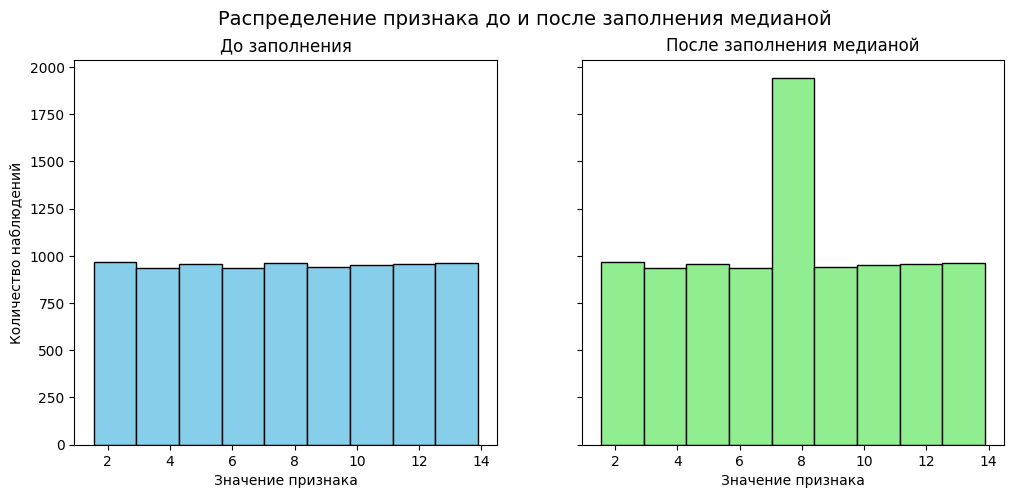

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(X_train['Скорость перехода через портал'].dropna(), bins=9, color='skyblue', edgecolor='black')
axes[0].set_title('До заполнения')
axes[0].set_xlabel('Значение признака')
axes[0].set_ylabel('Количество наблюдений')

axes[1].hist(X_train_filled, bins=9, color='lightgreen', edgecolor='black')
axes[1].set_title('После заполнения медианой')
axes[1].set_xlabel('Значение признака')

plt.suptitle('Распределение признака до и после заполнения медианой', fontsize=14)
plt.show()

In [86]:
from scipy.stats import entropy

In [87]:
p, bins = np.histogram(X_train['Скорость перехода через портал'].dropna(), bins=9)
q, _ = np.histogram(X_train_filled, bins=bins)

kl_div = entropy(p/sum(p), q/sum(q))
kl_div

np.float64(0.029379580843817053)

In [88]:
NRMSE(y_true, [X_masked['Скорость перехода через портал'].drop(mask_idx).median()] * len(y_true))

np.float64(1.0001)

#### <a id='toc1_6_1_2_'></a>[1.6.1.2. Заполнение средним](#toc0_)


In [89]:
mean_value = X_train['Скорость перехода через портал'].mean()
X_train_filled = X_train['Скорость перехода через портал'].fillna(mean_value)

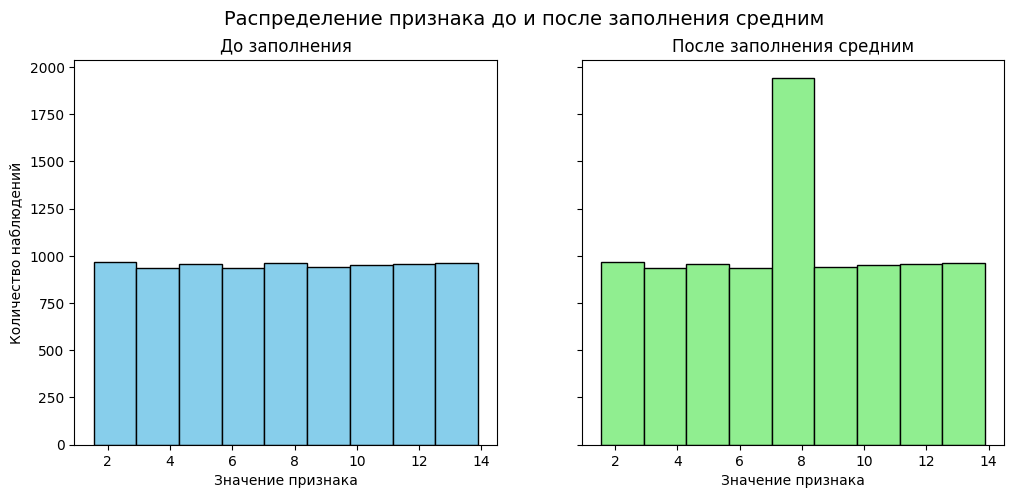

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(X_train['Скорость перехода через портал'].dropna(), bins=9, color='skyblue', edgecolor='black')
axes[0].set_title('До заполнения')
axes[0].set_xlabel('Значение признака')
axes[0].set_ylabel('Количество наблюдений')

axes[1].hist(X_train_filled, bins=9, color='lightgreen', edgecolor='black')
axes[1].set_title('После заполнения средним')
axes[1].set_xlabel('Значение признака')

plt.suptitle('Распределение признака до и после заполнения средним', fontsize=14)
plt.show()

In [91]:
abs(median_value - mean_value)

np.float64(0.008285798319327853)

Схожесть распределений после заполнения пропусков средним и медианой объясняется тем, что эти 2 значения почти никак не отличаются друг от друга, следовательно, распределения совпадают.

In [92]:
p, bins = np.histogram(X_train['Скорость перехода через портал'].dropna(), bins=9)
q, _ = np.histogram(X_train_filled, bins=bins)

kl_div = entropy(p/sum(p), q/sum(q))
kl_div

np.float64(0.029379580843817053)

In [93]:
NRMSE(y_true, [X_masked['Скорость перехода через портал'].drop(mask_idx).mean()] * len(y_true))

np.float64(1.0001)

#### <a id='toc1_6_1_3_'></a>[1.6.1.3. Заполнение модой](#toc0_)

In [94]:
mode_value = X_train['Скорость перехода через портал'].mode()[0]
X_train_filled = X_train['Скорость перехода через портал'].fillna(mode_value)

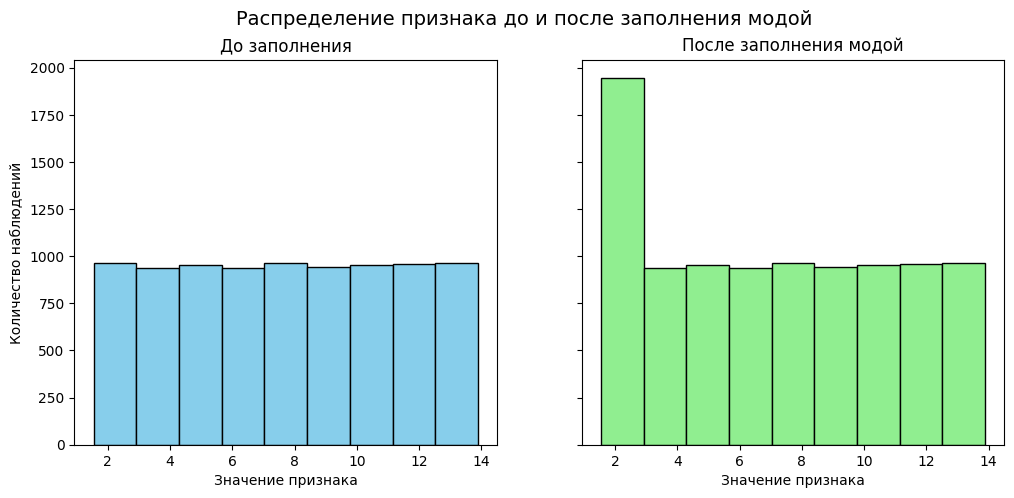

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(X_train['Скорость перехода через портал'].dropna(), bins=9, color='skyblue', edgecolor='black')
axes[0].set_title('До заполнения')
axes[0].set_xlabel('Значение признака')
axes[0].set_ylabel('Количество наблюдений')

axes[1].hist(X_train_filled, bins=9, color='lightgreen', edgecolor='black')
axes[1].set_title('После заполнения модой')
axes[1].set_xlabel('Значение признака')

plt.suptitle('Распределение признака до и после заполнения модой', fontsize=14)
plt.show()

In [96]:
p, bins = np.histogram(X_train['Скорость перехода через портал'].dropna())
q, _ = np.histogram(X_train_filled, bins=bins)

kl_div = entropy(p/sum(p), q/sum(q))
kl_div

np.float64(0.0292875932120139)

In [97]:
NRMSE(y_true, [X_masked['Скорость перехода через портал'].drop(mask_idx).mode()] * len(y_true))

np.float64(1.8512)

#### <a id='toc1_6_1_4_'></a>[1.6.1.4. Выбор оптимального статистического значения](#toc0_)

KL-дивергенции медианы (≈0.02987), среднего (≈0.02987) и моды (≈0.02987) почти совпадают, но по метрике NRMSE заполнение модой (≈1.8512) проигрывает заполнению медианой (≈1.0001) или средним (≈1.0001), так что остановимся на заполнении пропусков медианой, так как она даёт лучший результат, чем заполнение модой, и одинаковый результат с заполнением средним.

### <a id='toc1_6_2_'></a>[1.6.2. Заполнение с помощью машинных подходов](#toc0_)

Вычислим метрику NRMSE для IterativeImputer и KNNImputer, чтобы принять решение о том, какой подход лучше применять к исходной задаче.

#### <a id='toc1_6_2_1_'></a>[1.6.2.1. IterativeImputer](#toc0_)

In [98]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [99]:
imputer = IterativeImputer(random_state=seed)

In [100]:
X_imputed = pd.DataFrame(imputer.fit_transform(X_masked), columns=X_masked.columns, index = X_masked.index)
y_pred = X_imputed.loc[mask_idx, 'Скорость перехода через портал']
NRMSE(y_true, y_pred)

np.float64(0.0065)

#### <a id='toc1_6_2_2_'></a>[1.6.2.2. KNNImputer](#toc0_)

In [101]:
from sklearn.impute import KNNImputer

In [102]:
imputer = KNNImputer()

In [103]:
X_imputed = pd.DataFrame(imputer.fit_transform(X_masked), columns=X_masked.columns, index = X_masked.index)
y_pred = X_imputed.loc[mask_idx, 'Скорость перехода через портал']
NRMSE(y_true, y_pred)

np.float64(0.0223)

#### <a id='toc1_6_2_3_'></a>[1.6.2.3. Выбор оптимального машинного значения](#toc0_)

На маскированных данных IterativeImputer показал лучшие значения метрики NRMSE (≈0.0065), чем KNNImputer (≈0.0223), поэтому среди машинных методов сделаем выбор в пользу IterativeImputer.

### <a id='toc1_6_3_'></a>[1.6.3. Анализ результатов и выбор способа заполнения признаков](#toc0_)

Для заполнения пропусков в исходном датасете выберем заполнение с помощью IterativeImputer, так как метрика NRMSE у данного способа очень близка к 0, что говорит о том, что отклонение значений, выдаваемых моделью, от реальных очень мало и модель почти идеально восстанавливает пропуски.

In [104]:
imputer = IterativeImputer(random_state=seed)
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index = X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index = X_test.index)

In [105]:
X_train.isna().sum()

Вектор Мощи                       0
Скорость перехода через портал    0
Приток Силы Потока                0
Ритм магического ядра             0
Поток Энергий                     0
Сила Левого Потока                0
Сила Правого Потока               0
Пламя Стихий                      0
Температура вдоха Истока          0
Приток давления Выдоха Истока     0
Давление выдоха Истока            0
Печать Чародея                    0
Эмульсия Истока                   0
Дыхание Истока                    0
Тип Вектора Мощи                  0
dtype: int64

In [106]:
X_test.isna().sum()

Вектор Мощи                       0
Скорость перехода через портал    0
Приток Силы Потока                0
Ритм магического ядра             0
Поток Энергий                     0
Сила Левого Потока                0
Сила Правого Потока               0
Пламя Стихий                      0
Температура вдоха Истока          0
Приток давления Выдоха Истока     0
Давление выдоха Истока            0
Печать Чародея                    0
Эмульсия Истока                   0
Дыхание Истока                    0
Тип Вектора Мощи                  0
dtype: int64

## <a id='toc1_7_'></a>[1.7. Детекция выбросов и аномалий в данных](#toc0_)

Установим библиотеку seaborn, после чего имплементируем функцию, которая позволяет строить произвольные графики с интерфейсом данной библиотеки для каждой компоненты признакового пространства датасета. 

In [107]:
import seaborn as sns

In [108]:
import typing as t
from matplotlib.axes._axes import Axes

def draw_sns(df: pd.DataFrame, visualization_function: t.Callable[..., Axes], figsize: t.Tuple[int, int] = (20, 20), **kwargs) -> None:
    n_col = 3
    n = len(df.columns)
    n_row = int(np.ceil(n / n_col))
    
    _, ax = plt.subplots(n_row, n_col, figsize=figsize)
    
    columns = df.columns
    
    for i in range(n_row):
        for j in range(n_col):
            k = i * n_col + j
            if k == n:
                break
            column = columns[k]
            x = df[column]
            visualization_function(x, ax=ax[i, j], **kwargs)

### <a id='toc1_7_1_'></a>[1.7.1. Выявление выбросов в данных](#toc0_)

С помощью написанной функции построим график boxplot для всех столбцов обучающей части выборки с целью выявления признаков, содержащих выбросы

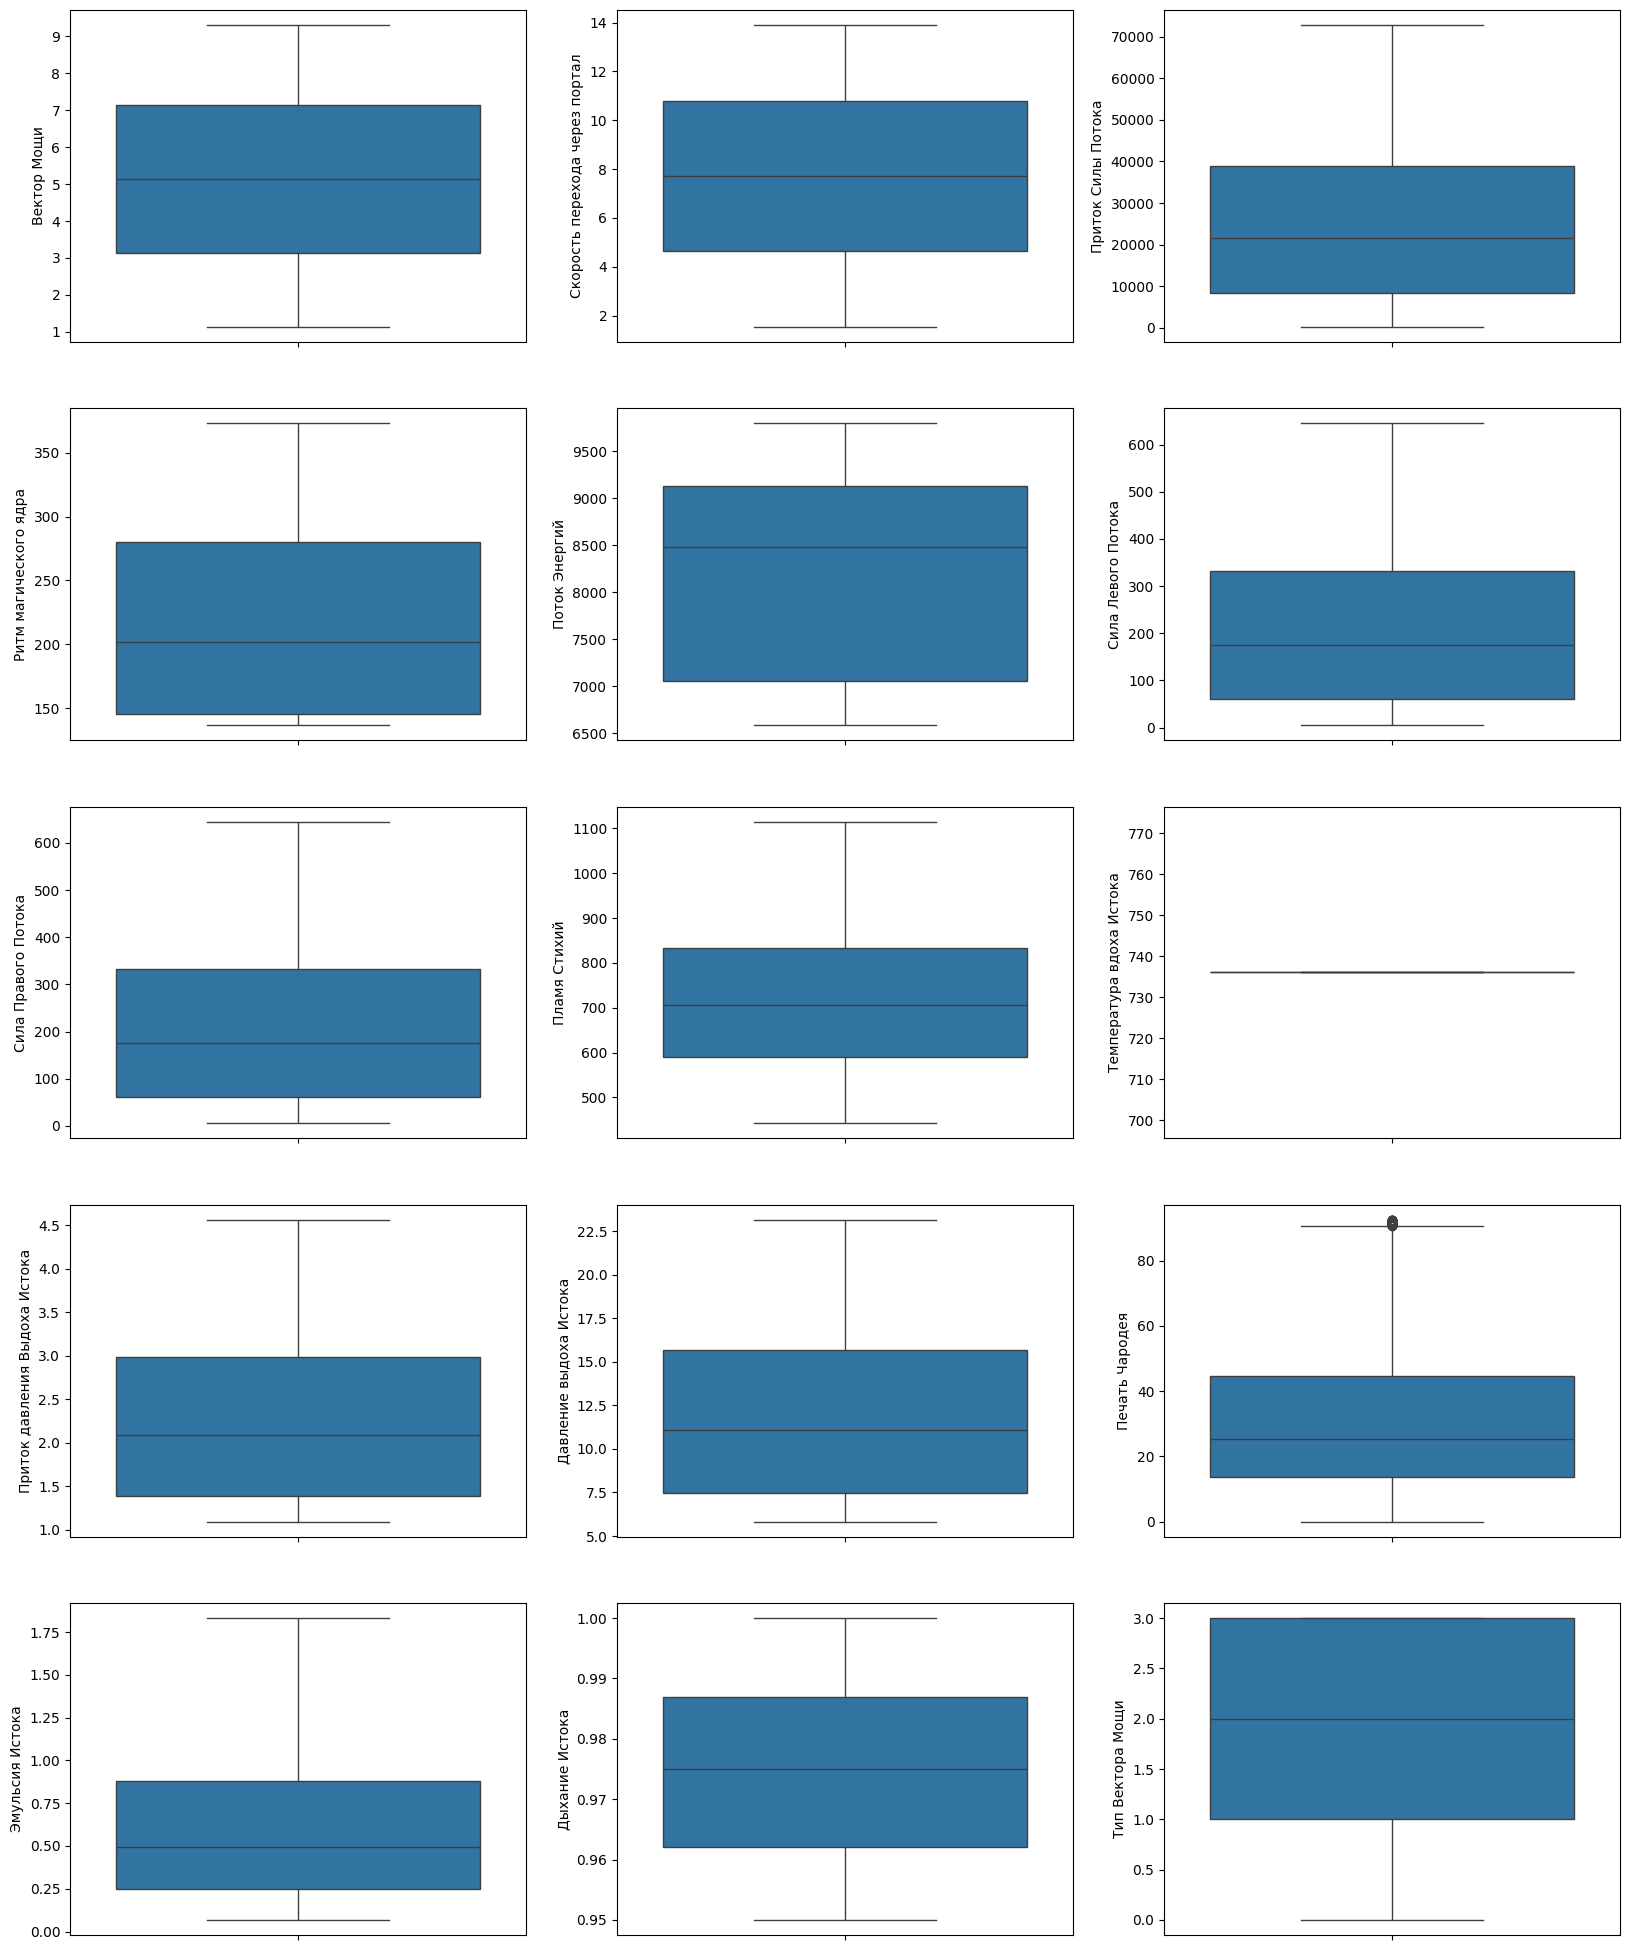

In [109]:
draw_sns(X_train, sns.boxplot, figsize=(20, 25))

По построенным графикам можно сделать вывод, что выбросы содержатся только в признаке `Печать Чародея`. На графиках других признаков выбросы не обнаружены.

Найдём строки, содержащие выбросы в столбце `Печать Чародея` с помощью методов IQR и Robust Z-score.

**IQR**

In [110]:
col = X_train['Печать Чародея']
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)

In [111]:
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [112]:
outliers_iqr = col[(col <= lower_bound) | (col >= upper_bound)]

**Robust Z-score**

In [113]:
median = col.median()
mad = (col - median).abs().median()
robust_z_score = (col - median) / (1.4826 * mad)

In [114]:
threshold = 3
outliers_z_score = col[np.abs(robust_z_score) >= threshold]

Найдём значения, отмеченные всеми методами как выбросы и удалим их

In [115]:
outliers_objects = np.intersect1d(
    outliers_iqr.index, 
    outliers_z_score.index
)
outliers_objects

array([  17,   35,   53,   62,   71,   80,   98,  107,  116,  125,  134,
        143,  152,  161,  242,  251,  260,  269,  278,  287,  296,  305,
        314,  323,  332,  341,  350,  359,  368,  386,  485,  494,  503,
        521,  530,  539,  548,  557,  566,  584,  593,  611,  710,  719,
        728,  746,  755,  764,  773,  782,  791,  800,  818,  827,  836,
        953,  971,  980,  989,  998, 1007, 1016, 1025, 1034, 1043, 1061,
       1187, 1196, 1205, 1214, 1223, 1250, 1259, 1268, 1277, 1295, 1412,
       1430, 1439, 1448, 1457, 1466, 1475, 1484, 1493, 1511, 1520, 1655,
       1664, 1682, 1691, 1700, 1709, 1718, 1727, 1736, 1745, 1880, 1898,
       1907, 1916, 1925, 1934, 1943, 1961, 2114, 2123, 2132, 2141, 2150,
       2159, 2168, 2177, 2186, 2195, 2204, 2348, 2357, 2366, 2375, 2384,
       2411, 2420, 2429, 2582, 2591, 2600, 2609, 2618, 2627, 2825, 2834,
       2843, 2852, 2861, 2870, 2879, 3050, 3059, 3068, 3077, 3086, 3104,
       3113, 3284, 3302, 3311, 3329, 3338, 3518, 35

In [116]:
outliers_objects.shape

(177,)

In [117]:
X_train = X_train.drop(index=outliers_objects)
y_train = y_train.drop(index=outliers_objects)

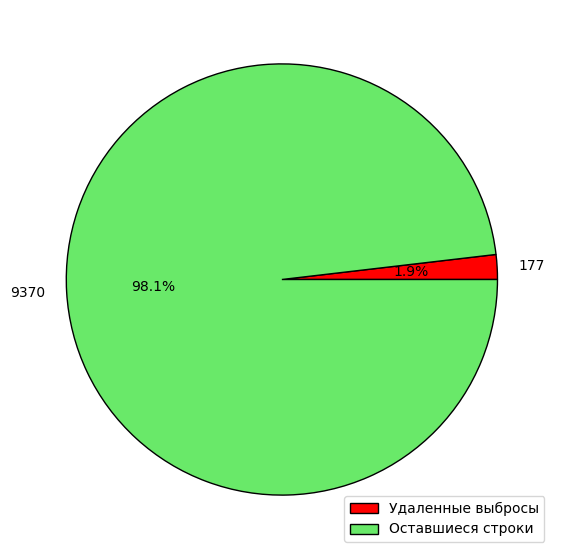

In [118]:
sizes = [len(outliers_objects), len(X_train)]

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=sizes,
    colors=['#FF0000', "#69E969"], 
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'}
)
plt.legend(['Удаленные выбросы', 'Оставшиеся строки'], loc='lower right')
plt.show()

### <a id='toc1_7_2_'></a>[1.7.2. Выявление аномалий в данных](#toc0_)

Для визуализации необходимо понизить пространство до двумерного. Сделаем это при помощи алгоритма UMAP, который способен эффективно сохранять как локальную, так и глобальную структуру данных при снижении размерности.

In [119]:
from umap import UMAP

X_2d = UMAP().fit_transform(X_train)

c:\proj\Practicum (5 term)\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\proj\Practicum (5 term)\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Для визуализации работы алгоритмов реализуем функцию, которая будет помечать аномальные объекты.

In [120]:
def draw_anomaly(X_2d: np.ndarray[float], anomaly_mask: np.ndarray[bool]) -> None:
    plt.scatter(X_2d[:, 0], X_2d[:, 1])
    plt.scatter(X_2d[anomaly_mask, 0], X_2d[anomaly_mask, 1], c="red", marker='x')

Также реализуем функцию, которая строит круговую диаграмму с долями аномальных объектов.

In [121]:
def draw_anomaly_pie(anomaly_mask: np.ndarray[bool]) -> None:
    _, counts = np.unique(anomaly_mask, return_counts=True)

    plt.pie(counts, 
            labels=counts,
            colors=["#69E969", '#FF0000'],
            autopct='%1.1f%%',
            wedgeprops={'edgecolor': 'black'})
    plt.legend(['Нормальные объекты', 'Аномалии'], loc='lower right')

Выполним поиск аномалий при помощи алгоритмов Isolation Forest, One-class SVM и DBSCAN

**Isolation Forest**

In [122]:
from pyod.models.iforest import IForest

isf = IForest().fit(X_train)
isf_anomaly = isf.predict(X_train)

c:\proj\Practicum (5 term)\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


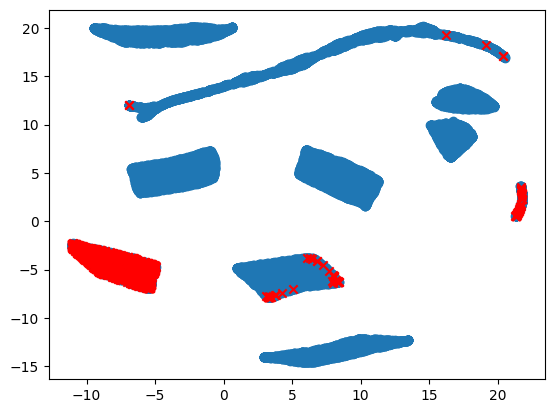

In [123]:
draw_anomaly(X_2d, isf_anomaly.astype(bool))

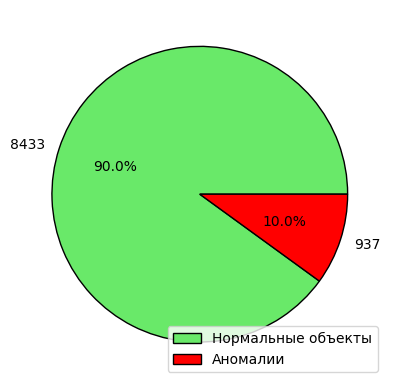

In [124]:
draw_anomaly_pie(isf_anomaly)

**One-class SVM**

In [125]:
from pyod.models.ocsvm import OCSVM

ocsvm = OCSVM().fit(X_train)
ocsvm_anomaly = ocsvm.predict(X_train)

c:\proj\Practicum (5 term)\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


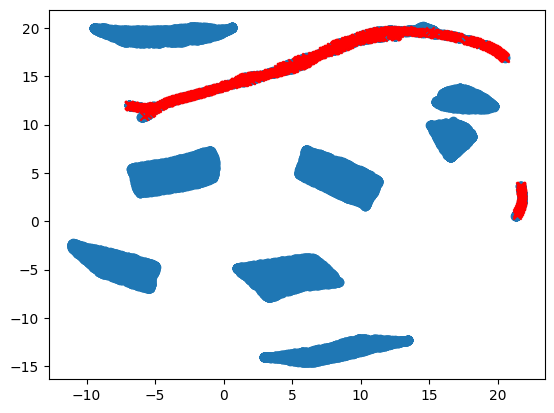

In [126]:
draw_anomaly(X_2d, ocsvm_anomaly.astype(bool))

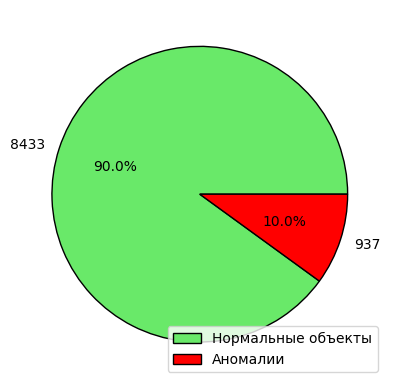

In [127]:
draw_anomaly_pie(ocsvm_anomaly)

**DBSCAN**

In [128]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

dbscan = DBSCAN(eps=0.2, min_samples=20)  
clusters = dbscan.fit_predict(X_train_scaled)

dbscan_anomaly = np.where(clusters == -1, 1, 0)

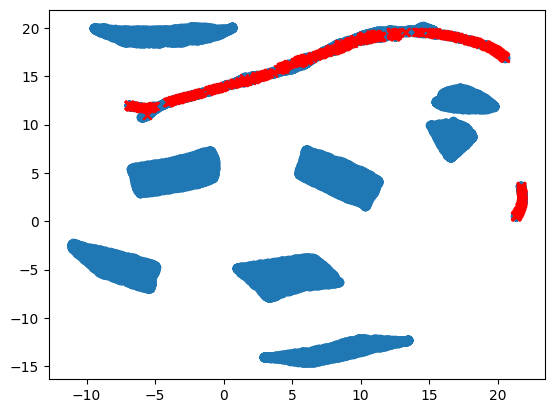

In [129]:
draw_anomaly(X_2d, dbscan_anomaly.astype(bool))

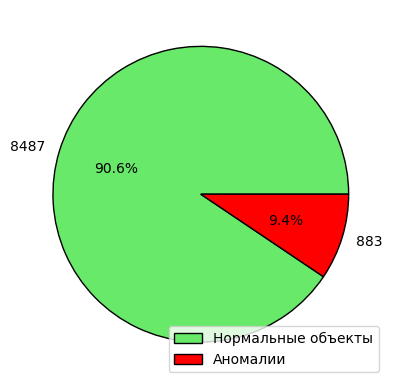

In [130]:
draw_anomaly_pie(dbscan_anomaly)

Найдём значения, отмеченные всеми методами как аномалии и удалим их

In [131]:
anomalies = np.all(np.array([
    isf_anomaly,
    ocsvm_anomaly,
    dbscan_anomaly
]), axis=0)
anomalies

array([False, False, False, ..., False, False, False], shape=(9370,))

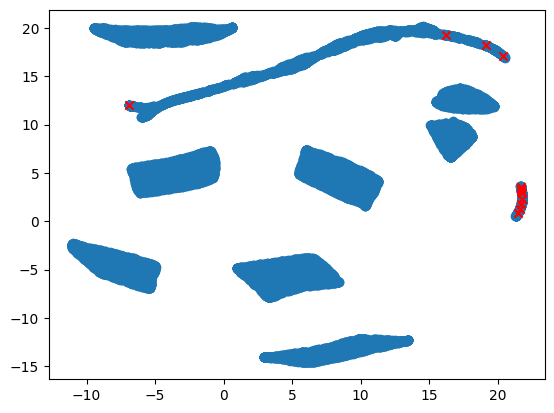

In [132]:
draw_anomaly(X_2d, anomalies.astype(bool))

In [133]:
anomaly_index = X_train.loc[anomalies].index
anomaly_index

Index([9081, 630, 702, 1107, 396, 153, 9333, 144, 864, 99, 873, 387, 468], dtype='int64')

In [134]:
anomaly_index.shape

(13,)

In [135]:
X_train = X_train.drop(index=anomaly_index)
y_train = y_train.drop(index=anomaly_index)

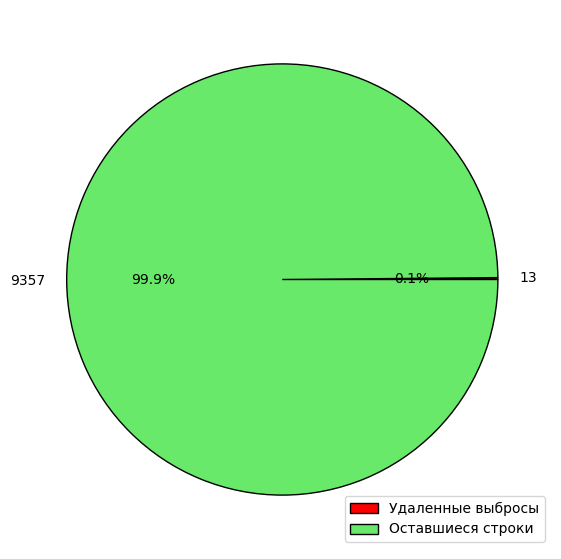

In [136]:
sizes = [len(anomaly_index), len(X_train)]

plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=sizes,
    colors=['#FF0000', "#69E969"], 
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'}
)
plt.legend(['Удаленные выбросы', 'Оставшиеся строки'], loc='lower right')
plt.show()

## <a id='toc1_8_'></a>[1.8. Подведение итогов раздела 1](#toc0_)

В рамках предварительной обработки данных был выполнен полный анализ исходного датасета и подготовка данных к дальнейшему моделированию. Основные результаты работы раздела:

- Выполнено подробное описание задачи и целевой переменной, определён тип задачи (регрессия) и диапазон значений целевого признака.
- Проанализировано признаковое пространство: определены входные и целевые признаки, выявлены ограничения на значения, задокументированы зависимости между признаками и формулы прикладной области.
- Сформировано виртуальное окружение и зафиксированы версии ключевых библиотек, установлен seed для воспроизводимости экспериментов.
- Проведён первичный анализ данных: проверены типы признаков, выполнено их приведение к корректным типам.
- Выполнена первичная фильтрация признаков: исключены уникальные идентификаторы и признаки с утечкой данных, а также признаки с чрезмерным количеством уникальных значений.
- Данные разделены на обучающую и тестовую выборки с сохранением пропорций исходного датасета.
- Обучена baseline-модель на основе линейной регрессии, которая будет служить точкой отсчёта для оценки качества более сложных моделей.
- Обработаны пропущенные значения: применены как статистические, так и машинные подходы, сформированы методы заполнения для тестовой выборки на основе обучающей.
- Кодированы категориальные признаки с учётом их структуры, исключена утечка информации.
- Проведён анализ выбросов и аномалий: выявлены выбросы с использованием методов IQR и Robust Z-score, аномалии – с помощью алгоритмов Isolation Forest, One-Class SVM и DBSCAN; произведено удаление соответствующих строк.
- Все промежуточные результаты визуализированы, проверены распределения признаков и контроль качества обработки данных.

Таким образом, на этом этапе сформирована качественная и подготовленная к обучению моделей выборка, обеспечена согласованность признаков и целевой переменной, а также минимизированы риски влияния пропусков, выбросов и аномалий на последующее обучение моделей.

# <a id='toc2_'></a>[2. Генерация новых признаков](#toc0_)

## <a id='toc2_1_'></a>[2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции)](#toc0_)

<Axes: >

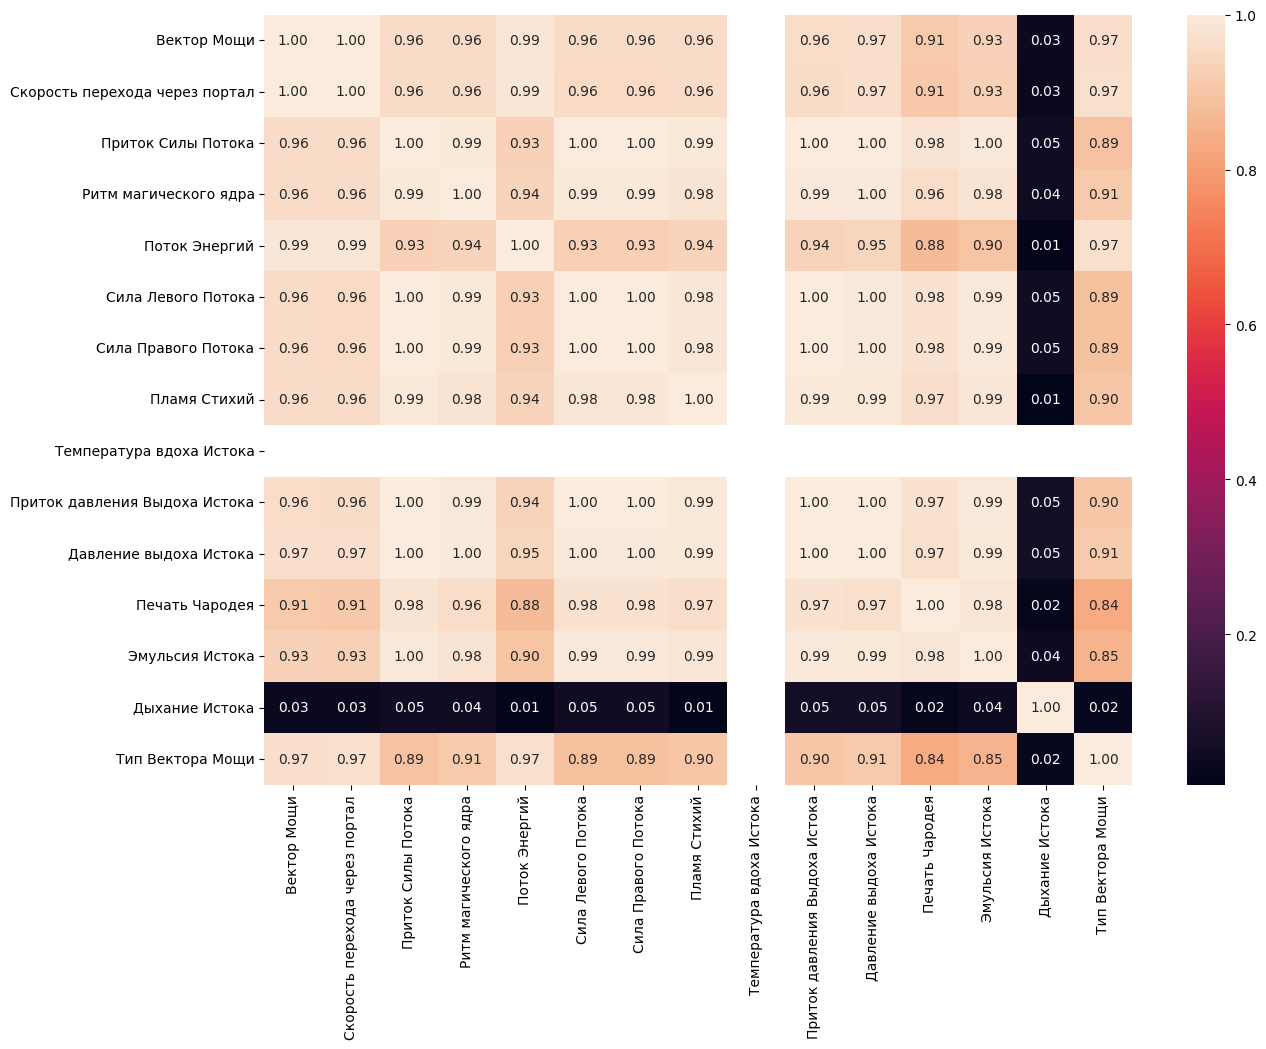

In [137]:
plt.figure(figsize=(14, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

По тепловой карте видна сильная линейная зависимость почти между всеми признаками, что говорит о наличии проблемы мультиколлинеарности в данных. Попробуем избавиться от этой проблемы, заменив некоторые старые признаки новыми, используя формулы прикладной области

## <a id='toc2_2_'></a>[2.2. Исправление проблемы мультиколлинеарности в данных](#toc0_)

Для данной прикладной области также справедливы следующие зависимости:
- Общая мощность потоков = ```Сила Левого Потока``` + ```Сила Правого Потока```
- Общая сила потоков = ```Сила Левого Потока``` + ```Сила Правого Потока``` + ```Приток Силы Потока```
- Общая сила ядра = ```Ритм магического ядра``` + ```Приток Силы Потока```
- Общее давление на выходе = ```Приток давления Выдоха Истока``` + ```Давление выдоха Истока```
- Магическая производительность = ```Скорость перехода через портал``` / ```Эмульсия Истока```
- Эффективность ядра = (```Ритм магического ядра``` + ```Приток Силы Потока```) / ```Эмульсия Истока```
- Степень износа магических источников = ```Дыхание Истока``` / ```Гармония Бессмертия```
- Расхождение в стабильности магии = | ```Дыхание Истока``` - ```Гармония Бессмертия``` |
- Баланс угасания = (```Дыхание Истока``` - ```Гармония Бессмертия```) / ```Скорость перехода через портал```

Заметим, что последние три формулы применить невозможно, так как в них используется значение целевой переменной ```Гармония Бессмертия```, которое мы не знаем на момент вычисления, т.к. его мы пытаемся предсказать.

Формулы ниже применять мы не будем, так как новые признаки будут являться линейными комбинациями существующих, значит, они не дадут никакой новой информации и не помогут устранить проблему мультиколлинеарности.

- Общая мощность потоков = ```Сила Левого Потока``` + ```Сила Правого Потока```
- Общая сила потоков = ```Сила Левого Потока``` + ```Сила Правого Потока``` + ```Приток Силы Потока```
- Общая сила ядра = ```Ритм магического ядра``` + ```Приток Силы Потока```
- Общее давление на выходе = ```Приток давления Выдоха Истока``` + ```Давление выдоха Истока```

Итого, формулы, которые мы добавим как новые признаки в датасет:
- Магическая производительность = ```Скорость перехода через портал``` / ```Эмульсия Истока```
- Эффективность ядра = (```Ритм магического ядра``` + ```Приток Силы Потока```) / ```Эмульсия Истока```

Удалим стоблец `Температура вдоха Истока`, так как в train-части этот признак имеет всего 1 уникальное значение, а также столбцы `Сила Правого Потока`, `Приток Силы Потока`, `Приток давления Выдоха Истока`, так как они полностью линейно коррелируют со многими другими признаками, значит, их можно восстановить и информация не теряется.

In [ ]:
def feature_engineering(df: pd.DataFrame):
    df = df.copy()

    df['Магическая производительность'] = df['Скорость перехода через портал'] / df['Эмульсия Истока']
    df['Эффективность ядра'] = (df['Ритм магического ядра'] + df['Приток Силы Потока']) / df['Эмульсия Истока']

    df.drop(columns=['Температура вдоха Истока', 'Сила Правого Потока', 'Приток Силы Потока', 'Приток давления Выдоха Истока'], inplace=True)

    return df

In [139]:
X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)

<Axes: >

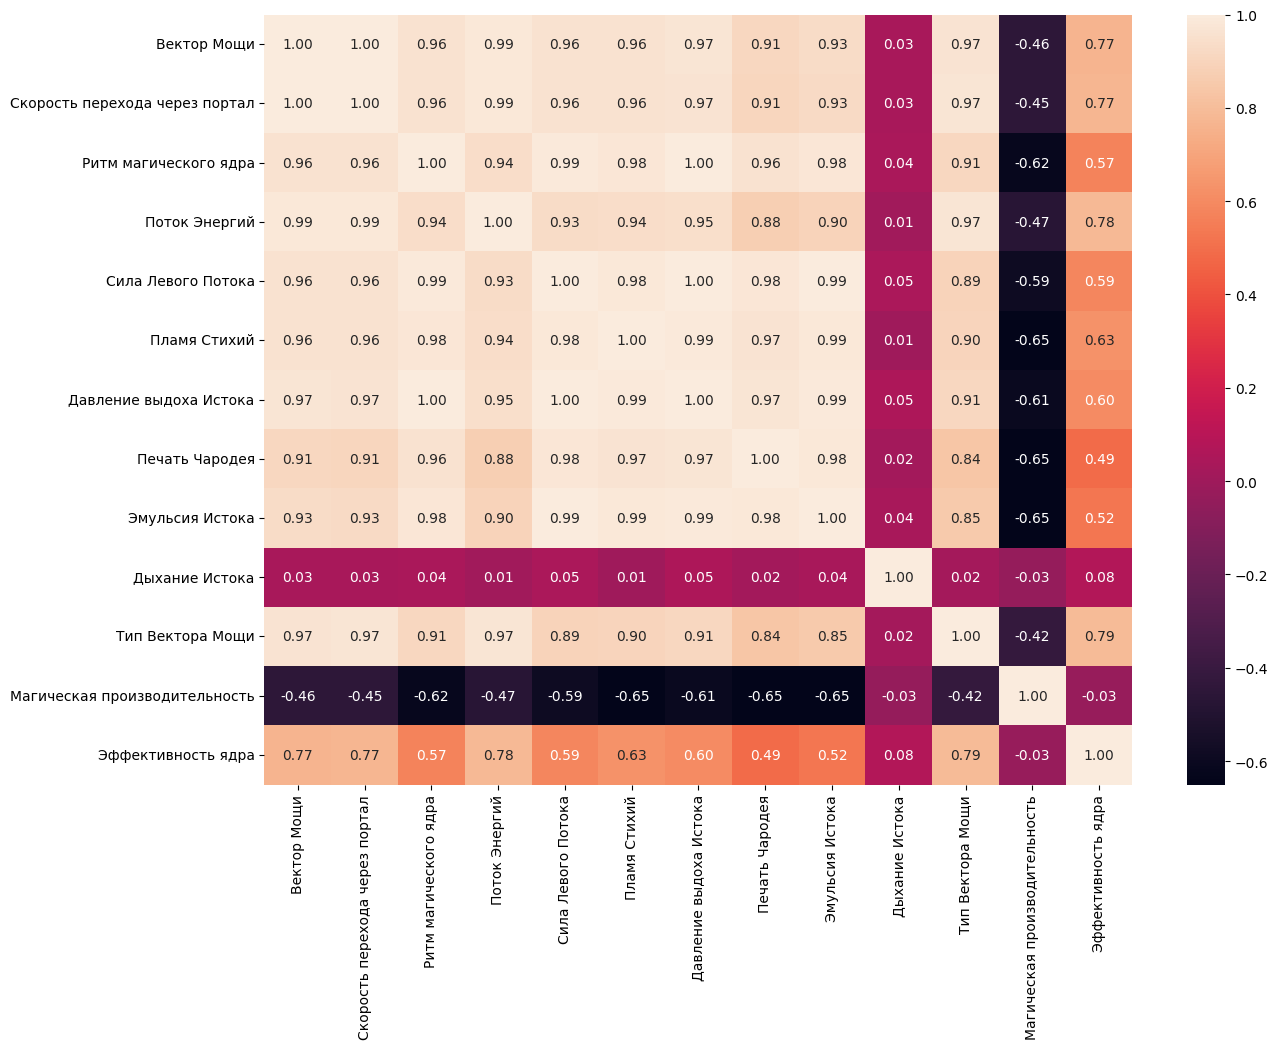

In [140]:
plt.figure(figsize=(14, 10))
corr = X_train_fe.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

Видно, что проблема всё ещё имеется, хотя добавленные признаки не так сильно коррелируют с остальными по сравнению с другими признаками

## <a id='toc2_3_'></a>[2.3. Анализ диспропорции и скалирование данных](#toc0_)

In [141]:
X_train_fe.describe()

,Вектор Мощи,Скорость перехода через портал,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Пламя Стихий,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Магическая производительность,Эффективность ядра
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,5.099452,7.616380,221.155881,8176.162356,220.182775,729.653345,12.120946,32.635656,0.642976,0.975121,1.647430,13.916462,37675.786239
std,2.586169,3.926886,79.209563,1078.808519,194.099190,167.618721,5.190920,24.861464,0.487067,0.014566,1.148166,4.221088,9711.822067
min,1.138000,1.541850,136.988624,6589.002000,5.313000,442.364000,5.828000,0.000000,0.068000,0.950000,0.000000,4.563501,4660.186277
25%,3.144000,4.629960,145.220958,7056.429000,60.316000,589.940000,7.445000,13.015000,0.246000,0.963000,1.000000,10.463186,34372.099793
50%,5.140000,7.716600,201.514738,8479.164000,175.260000,704.082000,11.069000,25.165000,0.494000,0.975000,2.000000,13.677873,42728.514277
75%,7.148000,10.803240,280.447463,9129.664000,332.310000,829.746000,15.602000,44.268000,0.876000,0.988000,3.000000,17.945581,44211.884584
max,9.300000,13.896635,372.879926,9797.103000,645.249000,1099.549000,23.140000,90.738000,1.796000,1.000000,3.000000,25.094634,47103.491546


Заметно сильное отклонение между средними значениями и стандартными отклонениями столбцов. Попробуем применить скалирование, чтобы избавиться от диспропорции признаков.

In [142]:
scaler_standard = StandardScaler()
X_train_std = pd.DataFrame(scaler_standard.fit_transform(X_train_fe), columns=X_train_fe.columns)
X_test_std = pd.DataFrame(scaler_standard.transform(X_test_fe), columns=X_test_fe.columns)

In [143]:
X_train_std.describe()

,Вектор Мощи,Скорость перехода через портал,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Пламя Стихий,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Магическая производительность,Эффективность ядра
count,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03
mean,3.941132e-16,1.480772e-16,-4.556221e-17,-1.169430e-16,-7.593702e-17,-3.834820e-16,2.126237e-16,-1.518740e-17,2.490734e-16,-4.639752e-15,2.885607e-17,-6.682458e-17,2.038909e-16
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-1.531866e+00,-1.546990e+00,-1.062646e+00,-1.471295e+00,-1.107069e+00,-1.714037e+00,-1.212364e+00,-1.312771e+00,-1.180549e+00,-1.724666e+00,-1.434913e+00,-2.215889e+00,-3.399709e+00
25%,-7.561596e-01,-7.605465e-01,-9.587098e-01,-1.037991e+00,-8.236784e-01,-8.335633e-01,-9.008414e-01,-7.892417e-01,-8.150765e-01,-8.321587e-01,-5.639119e-01,-8.181446e-01,-3.401898e-01
50%,1.567973e-02,2.552294e-02,-2.479775e-01,2.808819e-01,-2.314547e-01,-1.525648e-01,-2.026619e-01,-3.005074e-01,-3.058795e-01,-8.305739e-03,3.070890e-01,-5.652619e-02,5.202935e-01
75%,7.921593e-01,8.115924e-01,7.485807e-01,8.838942e-01,5.777109e-01,5.971768e-01,6.706404e-01,4.679115e-01,4.784482e-01,8.842017e-01,1.178090e+00,9.545725e-01,6.730403e-01
max,1.624323e+00,1.599382e+00,1.915579e+00,1.502609e+00,2.190060e+00,2.206886e+00,2.122869e+00,2.337169e+00,2.367405e+00,1.708055e+00,1.178090e+00,2.648315e+00,9.707971e-01


In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
X_train_mm = pd.DataFrame(scaler_minmax.fit_transform(X_train_fe), columns=X_train_fe.columns)
X_test_mm = pd.DataFrame(scaler_minmax.transform(X_test_fe), columns=X_test_fe.columns)

In [145]:
X_train_mm.describe()

,Вектор Мощи,Скорость перехода через портал,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Пламя Стихий,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Магическая производительность,Эффективность ядра
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.00000,9357.000000,9357.000000,9357.000000
mean,0.485353,0.491674,0.356805,0.494735,0.335768,0.437151,0.363502,0.359669,0.332741,0.50242,0.549143,0.455550,0.777875
std,0.316855,0.317843,0.335788,0.336276,0.303310,0.255056,0.299845,0.273992,0.281868,0.29133,0.382722,0.205594,0.228819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.245773,0.249953,0.034899,0.145702,0.085951,0.224558,0.093403,0.143435,0.103009,0.26000,0.333333,0.287353,0.700038
50%,0.490321,0.499786,0.273542,0.589184,0.265569,0.398241,0.302738,0.277337,0.246528,0.50000,0.666667,0.443929,0.896922
75%,0.736339,0.749620,0.608157,0.791952,0.510984,0.589457,0.564579,0.487866,0.467593,0.76000,1.000000,0.651795,0.931871
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [146]:
from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()
X_train_rb = pd.DataFrame(scaler_robust.fit_transform(X_train_fe), columns=X_train_fe.columns)
X_test_rb = pd.DataFrame(scaler_robust.transform(X_test_fe), columns=X_test_fe.columns)

In [147]:
X_train_rb.describe()

,Вектор Мощи,Скорость перехода через портал,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Пламя Стихий,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Магическая производительность,Эффективность ядра
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-0.010127,-0.016235,0.145246,-0.146149,0.165161,0.106633,0.128962,0.239038,0.236470,0.004839,-0.176285,0.031887,-0.513500
std,0.645896,0.636110,0.585755,0.520350,0.713616,0.698976,0.636376,0.795490,0.773123,0.582659,0.574083,0.564136,0.986995
min,-0.999500,-1.000238,-0.477171,-0.911697,-0.624819,-1.091374,-0.642516,-0.805203,-0.676190,-1.000000,-1.000000,-1.218109,-3.868817
25%,-0.498501,-0.500000,-0.416293,-0.686239,-0.422598,-0.475976,-0.444281,-0.388763,-0.393651,-0.480000,-0.500000,-0.429633,-0.849248
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.501499,0.500000,0.583707,0.313761,0.577402,0.524024,0.555719,0.611237,0.606349,0.520000,0.500000,0.570367,0.150752
max,1.038961,1.001094,1.267246,0.635692,1.727939,1.649112,1.479833,2.098135,2.066667,1.000000,0.500000,1.525816,0.444621


Как можно заметить, после скалирования диспропорции в признаках больше не видно

## <a id='toc2_4_'></a>[2.4. Формирование нового признакового пространства при помощи PCA](#toc0_)

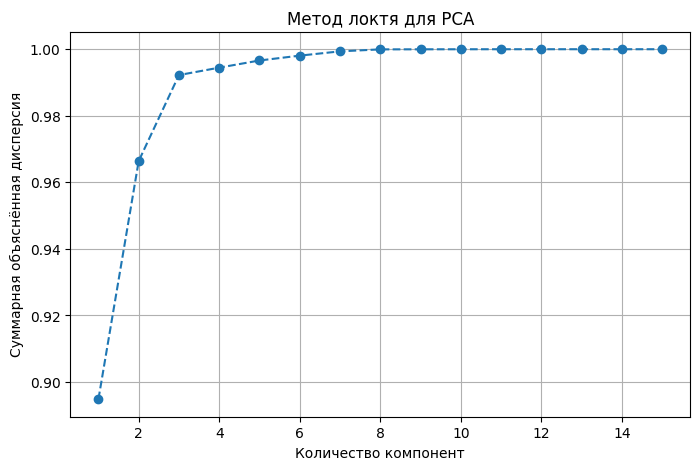

In [148]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.title('Метод локтя для PCA')
plt.grid(True)
plt.show()

По графику видно, что после третьей компоненты рост объяснённой дисперсии сильно замедляется, значит, будем строить новое признаковое пространство размерности 3

In [149]:
X_train_scaled.shape

(9357, 15)

In [150]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca.shape

(9357, 3)

In [151]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
X_test_pca.shape

(2387, 3)

## <a id='toc2_5_'></a>[2.5. Подведение итогов раздела 2](#toc0_)

В ходе работы по генерации и трансформации признаков были выполнены следующие ключевые действия:

- Построена тепловая карта корреляций входных признаков, что позволило выявить сильные линейные зависимости и мультиколлинеарность.
- С использованием формул прикладной области устранены выявленные корреляции между признаками. Сильно коррелирующие признаки заменены на новые, между которыми отсутствует значимая корреляция, при сохранении размерности признакового пространства.
- Проведён анализ диспропорции значений признаков: рассчитаны средние значения и стандартные отклонения, что позволило определить необходимость скалирования отдельных признаков.
- Выполнено масштабирование признаков различными методами (стандартизация, MinMax-преобразование, робастное преобразование), при этом исходный датасет без скалирования сохранён для последующих экспериментов.
- Применён метод главных компонент (PCA) для формирования нового признакового пространства: определена оптимальная размерность с помощью анализа суммарной объяснённой дисперсии и создано новое пространство признаков для обучающей и тестовой выборок.

Таким образом, после генерации признаков получен качественный и подготовленный к обучению моделей набор данных с устранённой мультиколлинеарностью и диспропорцией признаков.


# <a id='toc3_'></a>[3. Выбор моделей ML и метрик](#toc0_)

In [152]:
X_train = X_train_fe
X_test = X_test_fe

Построим графики зависимости входных признаков и целевого для того, чтобы принять решение о том, какие модели будем использовать. Для начала построим тепловую карту корреляции.

In [153]:
corr = X_train.corrwith(y_train)
corr = pd.DataFrame(corr, columns=["Гармония Бессмертия"])

In [154]:
corr

,Гармония Бессмертия
Вектор Мощи,0.031114
Скорость перехода через портал,0.030674
Ритм магического ядра,0.035985
Поток Энергий,0.039511
Сила Левого Потока,0.040944
Пламя Стихий,0.000768
Давление выдоха Истока,0.019375
Печать Чародея,0.023090
Эмульсия Истока,0.025912
Дыхание Истока,-0.014820


<Axes: >

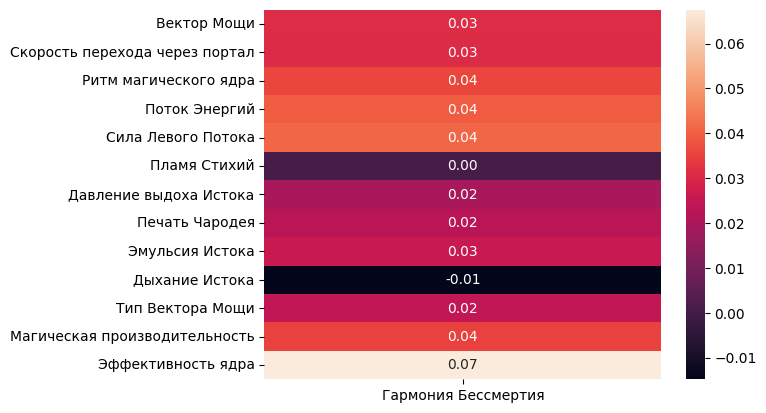

In [155]:
sns.heatmap(corr, annot=True, fmt='.2f')

На графике видна слабая корреляция входных признаков и целевого, следовательно, сделаем выбор в пользу моделей, хорошо работающих с нелинейными зависимостями

Теперь построим точечные графики зависимости каждого входного признака с целевым.

In [156]:
df_pair = X_train.copy()
df_pair["Гармония Бессмертия"] = y_train

In [157]:
df_pair

,Вектор Мощи,Скорость перехода через портал,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Пламя Стихий,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Магическая производительность,Эффективность ядра,Гармония Бессмертия
6906,4.161,6.173280,162.049318,7752.317,113.762,636.596,8.917,17.025,0.337,0.979,1.0,18.318338,44162.348125,0.988
11444,6.175,9.259920,241.562190,8800.319,245.948,750.474,13.131,32.862,0.651,0.998,2.0,14.224147,46089.964962,0.998
193,5.140,7.716600,201.517461,8514.017,175.312,711.015,10.959,25.202,0.499,0.950,2.0,15.464128,43770.700322,0.996
2575,2.088,3.086640,140.864616,6784.165,22.510,592.385,6.959,24.039,0.246,0.961,0.0,12.547317,21844.303319,0.975
8146,2.088,3.086640,145.015812,6810.886,29.765,590.775,7.107,3.925,0.245,0.984,0.0,12.598531,27755.223723,0.996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,9.300,13.889880,372.844635,9758.119,644.794,1075.306,22.653,89.242,1.767,0.976,3.0,7.860713,41393.762102,0.987
501,7.148,10.803240,280.448510,9132.917,332.135,850.243,15.633,45.564,0.902,0.952,3.0,11.976984,43528.447350,0.978
6782,6.175,9.259920,241.626907,8823.896,246.255,758.493,13.071,33.248,0.658,0.978,2.0,14.072827,45644.294692,1.000
4444,8.206,12.346560,323.323186,9317.637,437.948,914.109,18.175,59.322,1.174,0.968,3.0,10.516661,43711.369835,1.000


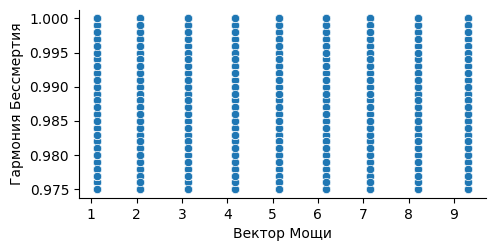

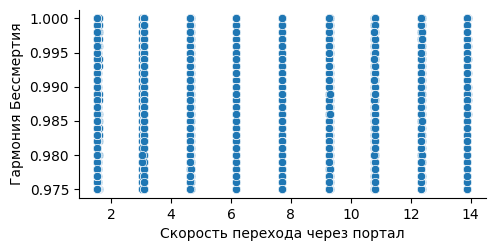

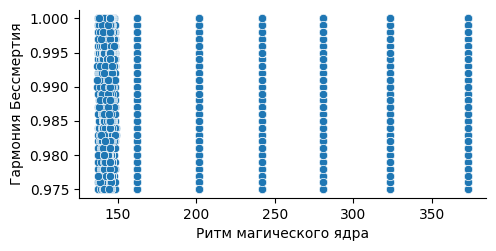

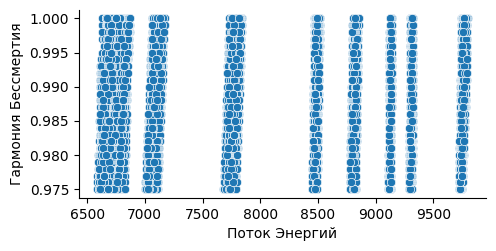

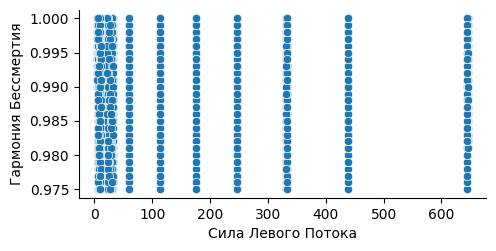

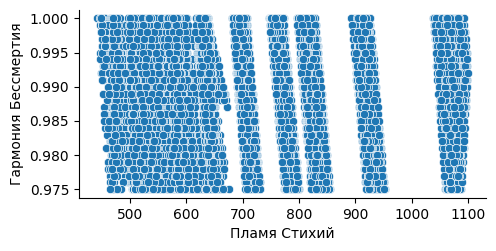

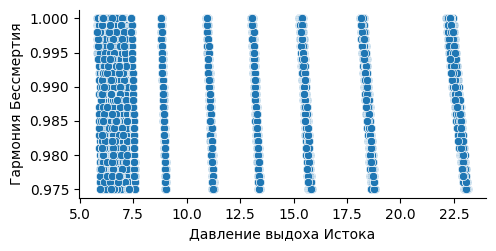

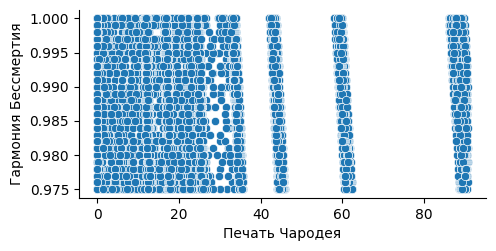

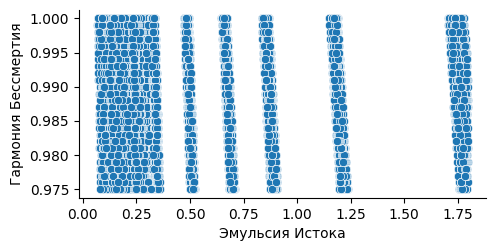

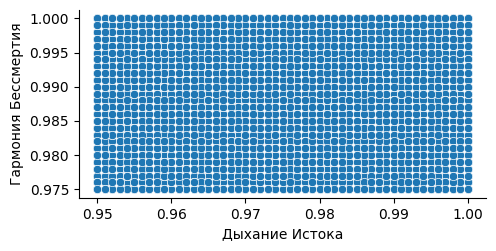

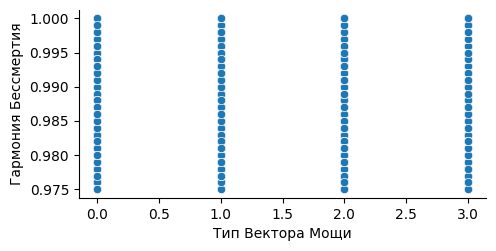

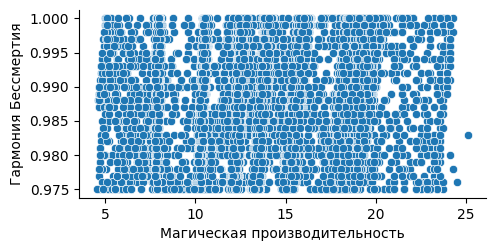

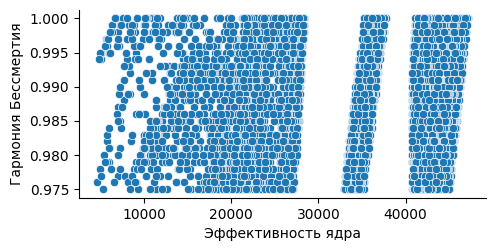

In [158]:
for col in df_pair.columns[:-1]:
    sns.pairplot(df_pair, y_vars="Гармония Бессмертия", x_vars=col, height=2.5, aspect=2)

На графиках виден хаотичный разброс точек по всей плоскости, это говорит о том, что чёткой зависимости между входными признаками и целевым не прослеживается.

In [159]:
X_train.shape

(9357, 13)

Пул моделей для решения задач будет состоять из: RandomForestRegressor, CatBoostRegressor и полиномиальная линейная регрессия. Выбор пал именно на эти модели, так как: 
- В данных не прослеживается чёткой линейной зависимости, данные модели способны выявлять нелинейные зависимости
- В обучающей выборке содержится 9357 строк, что позволяет обоснованно применить ансамблевые и линейные алгоритмы. Данных не слишком малое количество для того, чтобы попробовать применить тяжёлый алгоритм градиентного бустинга (CatBoost)

Концептуальное описание выбранных моделей:

- **RandomForestRegressor** — ансамблевый метод, основанный на построении множества деревьев решений. Каждое дерево обучается на случайной подвыборке данных и случайном подмножестве признаков. Финальный прогноз модели формируется как среднее предсказаний всех деревьев. Благодаря случайной подвыборке и усреднению модель устойчива к шуму и выбросам, а также способна выявлять сложные нелинейные зависимости между признаками.

- **CatBoostRegressor** — алгоритм градиентного бустинга на решающих деревьях. Модель обучается последовательно, каждая новая итерация исправляет ошибки предыдущих деревьев. Особенность CatBoost — эффективная обработка категориальных признаков, борьба с переобучением и высокая точность прогнозов на сложных зависимостях. Алгоритм хорошо работает даже на относительно небольших выборках и способен выявлять нелинейные связи.

- **Полиномиальная линейная регрессия** — расширение классической линейной модели, которое добавляет полиномиальные комбинации исходных признаков для моделирования нелинейных зависимостей. Например, для признаков \(x_1\) и \(x_2\) создаются новые признаки \(x_1^2, x_2^2, x_1 x_2\). Модель остаётся интерпретируемой и позволяет учитывать взаимодействия между признаками, что делает её полезной для выявления умеренно сложных зависимостей.


Пул метрик для задачи будет состоять из: MAE, MSE, RMSE, MAPE, R2. Подбирать гиперпараметры будем по метрике MAE, так как:
- Разброс целевого признака маленький, при использовании квадратичной метрики ошибка не будет заметна вовсе
- МАЕ хорошо интерпретируется
- Менее чувствительна к выбросам, чем квадратичные метрики

In [160]:
def print_metrics(y_test, y_pred):
    print(f'MAE: {round(mean_absolute_error(y_test, y_pred), 4)}')
    print(f'MSE: {round(mean_squared_error(y_test, y_pred), 4)}')
    print(f'RMSE: {round(root_mean_squared_error(y_test, y_pred), 4)}')
    print(f'MAPE: {round(mean_absolute_percentage_error(y_test, y_pred), 4)}')
    print(f'R^2: {round(r2_score(y_test, y_pred), 2)}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# <a id='toc4_'></a>[4. Обучение моделей ML и подбор гиперпараметров](#toc0_)

RandomForestRegressor

In [ ]:
def tune_rf(X_train, X_test):
    def objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 150, step=50)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 6)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
        ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 0.05)

        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            ccp_alpha=ccp_alpha,
            n_jobs=-1
        )
        
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        return -scores.mean()
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    best_params = study.best_params
    final_model = RandomForestRegressor(
        **best_params,
        n_jobs=-1
    )
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)
    print_metrics(y_pred, y_test)
    return final_model

CatBoost

In [164]:
def tune_cat(X_train, X_test):
    def objective(trial):
        iterations = trial.suggest_int('iterations', 500, 1200, step=100)
        learning_rate = trial.suggest_float('learning_rate', 0.03, 0.2)
        depth = trial.suggest_int('depth', 4, 8)
        l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1.0, 5.0)
        model_size_reg = trial.suggest_float('model_size_reg', 0.0, 0.5)

        model = CatBoostRegressor(
            iterations=iterations,
            learning_rate=learning_rate,
            depth=depth,
            l2_leaf_reg=l2_leaf_reg,
            model_size_reg=model_size_reg,
            verbose=False
        )

        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        return -scores.mean()
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    best_params = study.best_params
    final_model = CatBoostRegressor(
        **best_params
    )
    final_model.fit(X_train, y_train, verbose=False)
    y_pred = final_model.predict(X_test)
    print_metrics(y_pred, y_test)
    return final_model

PolynomialRegression

In [ ]:
def tune_reg(X_train, X_test):
    def objective(trial):
        degree = trial.suggest_int("degree", 1, 3)
        alpha = trial.suggest_float("alpha", 1e-3, 1.0, log=True)
        l1_ratio = trial.suggest_float("l1_ratio", 0.1, 0.9)

        model = Pipeline([
            ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
            ("reg", ElasticNet(alpha=alpha, l1_ratio=l1_ratio))
        ])

        scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
        return -scores.mean()
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    best_params = study.best_params
    final_model = Pipeline([
        ("poly", PolynomialFeatures(degree=best_params["degree"], include_bias=False)),
        ("reg", ElasticNet(alpha=best_params["alpha"], l1_ratio=best_params["l1_ratio"]))
    ])
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)
    print_metrics(y_pred, y_test)
    return final_model

# <a id='toc5_'></a>[5. Вычисление метрик на новых данных](#toc0_)

In [479]:
data = [['Без скалирования', [X_train, X_test]], 
        ['С StandardScaler', [X_train_std, X_test_std]], 
        ['С RobustScaler', [X_train_rb, X_test_rb]], 
        ['С MinMaxScaler', [X_train_mm, X_test_mm]], 
        ['PCA', [X_train_pca, X_test_pca]]]

In [485]:
for x in data:
    print(x[0])
    tune_rf(*x[1])
    tune_cat(*x[1])
    tune_reg(*x[1])

Без скалирования
MAE: 0.0064
MSE: 0.0001
RMSE: 0.0074
MAPE: 0.0065
R^2: -4.4607854912470715e+27
MAE: 0.0004
MSE: 0.0
RMSE: 0.0006
MAPE: 0.0004
R^2: 0.99
MAE: 0.001
MSE: 0.0
RMSE: 0.0015
MAPE: 0.001
R^2: 0.96
С StandardScaler
MAE: 0.0064
MSE: 0.0001
RMSE: 0.0074
MAPE: 0.0065
R^2: -4.4607862914344427e+27
MAE: 0.0004
MSE: 0.0
RMSE: 0.0007
MAPE: 0.0004
R^2: 0.99
MAE: 0.0033
MSE: 0.0
RMSE: 0.0041
MAPE: 0.0034
R^2: 0.02
С RobustScaler
MAE: 0.0037
MSE: 0.0
RMSE: 0.0046
MAPE: 0.0037
R^2: 0.14
MAE: 0.0004
MSE: 0.0
RMSE: 0.0006
MAPE: 0.0004
R^2: 0.99
MAE: 0.0064
MSE: 0.0001
RMSE: 0.0074
MAPE: 0.0065
R^2: -137.06
С MinMaxScaler
MAE: 0.0064
MSE: 0.0001
RMSE: 0.0074
MAPE: 0.0065
R^2: -4.4607872694752947e+27
MAE: 0.0004
MSE: 0.0
RMSE: 0.0006
MAPE: 0.0004
R^2: 0.99
MAE: 0.0064
MSE: 0.0001
RMSE: 0.0074
MAPE: 0.0065
R^2: -1.1151931850121216e+27
PCA
MAE: 0.0064
MSE: 0.0001
RMSE: 0.0074
MAPE: 0.0065
R^2: 0.0
MAE: 0.001
MSE: 0.0
RMSE: 0.0024
MAPE: 0.001
R^2: 0.89
MAE: 0.0064
MSE: 0.0001
RMSE: 0.0075
MAPE:

| Без скалирования | MAE        | MSE     | RMSE       | MAPE       | R²        |
| -------------- | ---------- | ------- | ---------- | ---------- | --------- |
| RandomForest   | 0.0064     | 0.0001  | 0.0074     | 0.0065     | -4.46e+27 |
| **CatBoost**   | **0.0004** | **0.0** | **0.0006** | **0.0004** | **0.99**  |
| Полиномиальная | 0.0010     | 0.0     | 0.0015     | 0.0010     | 0.96      |


| StandardScaler | MAE        | MSE     | RMSE       | MAPE       | R²        |
| -------------- | ---------- | ------- | ---------- | ---------- | --------- |
| RandomForest   | 0.0064     | 0.0001  | 0.0074     | 0.0065     | -4.46e+27 |
| **CatBoost**   | **0.0004** | **0.0** | **0.0007** | **0.0004** | **0.99**  |
| Полиномиальная | 0.0033     | 0.0     | 0.0041     | 0.0034     | 0.02      |


| RobustScaler   | MAE        | MSE     | RMSE       | MAPE       | R²       |
| -------------- | ---------- | ------- | ---------- | ---------- | -------- |
| RandomForest   | 0.0037     | 0.0     | 0.0046     | 0.0037     | 0.14     |
| **CatBoost**   | **0.0004** | **0.0** | **0.0006** | **0.0004** | **0.99** |
| Полиномиальная | 0.0064     | 0.0001  | 0.0074     | 0.0065     | -137.06  |


| MinMaxScaler   | MAE        | MSE     | RMSE       | MAPE       | R²        |
| -------------- | ---------- | ------- | ---------- | ---------- | --------- |
| RandomForest   | 0.0064     | 0.0001  | 0.0074     | 0.0065     | -4.46e+27 |
| **CatBoost**   | **0.0004** | **0.0** | **0.0006** | **0.0004** | **0.99**  |
| Полиномиальная | 0.0064     | 0.0001  | 0.0074     | 0.0065     | -1.12e+27 |


| PCA            | MAE        | MSE     | RMSE       | MAPE       | R²       |
| -------------- | ---------- | ------- | ---------- | ---------- | -------- |
| RandomForest   | 0.0064     | 0.0001  | 0.0074     | 0.0065     | 0.00     |
| **CatBoost**   | **0.0010** | **0.0** | **0.0024** | **0.0010** | **0.89** |
| Полиномиальная | 0.0064     | 0.0001  | 0.0075     | 0.0065     | -65.72   |


Лучше всех справился CatBoostRegressor, он показывает примерно одинаковые результаты как без скалирования, так и со скалированием, и результаты хуже после применения PCA. Полиномиальная регрессия и RandomForest испытывают проблемы с метрикой R^2, она уходит в огромные отрицательные значения, это можно обосновать тем, что разброс целевого признака очень низкий (0,975 - 1) и дисперсия практически равна 0, что приводит к тому, что даже нормальные отклонения выдают огромное значение ошибки

In [165]:
final_model = tune_cat(X_train, X_test)

MAE: 0.0004
MSE: 0.0
RMSE: 0.0007
MAPE: 0.0004
R^2: 0.99


Построим график пчелиного роя для определения влияния признаков на итоговое предсказание

C:\Users\admin\AppData\Local\Temp\ipykernel_10280\2872934978.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train)


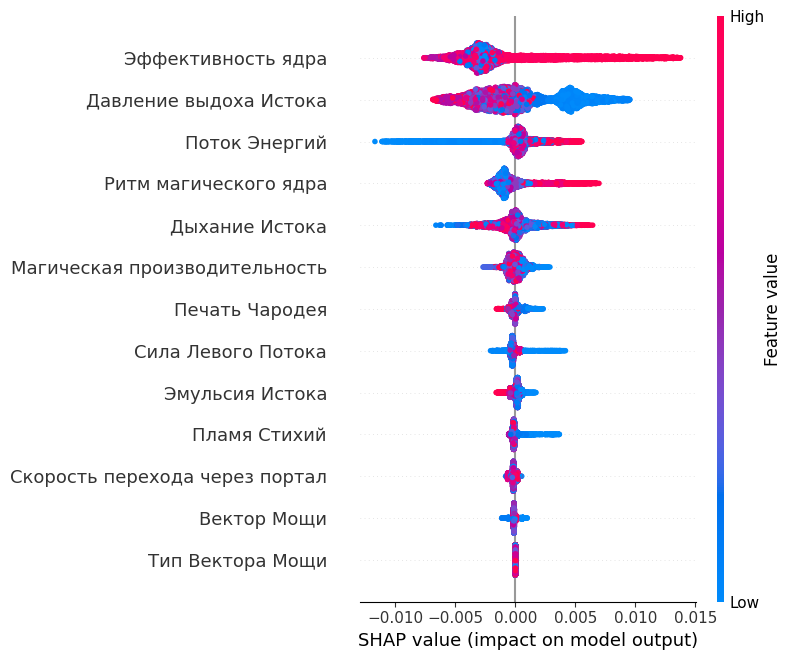

In [167]:
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

Как можно видеть, наибольшее влияние на предсказание модели оказывают признаки `Эффективность ядра`, `Давление выдоха Истока` и `Поток Энергий`

Сравним метрики CatBoost и метрики baseline-модели для определения того, была ли предобработка данных эффективной

| Модель                      | MAE        | MSE     | RMSE       | MAPE       | R²       |
| --------------------------- | ---------- | ------- | ---------- | ---------- | -------- |
| Baseline (LinearRegression) | 0.0014     | 0.0     | 0.0020     | 0.0014     | 0.92     |
| **CatBoostRegressor**       | **0.0004** | **0.0** | **0.0006** | **0.0004** | **0.99** |


Модель CatBoostRegressor показала устойчивое улучшение качества по всем метрикам, снизив MAE с 0.0014 до 0.0004, что соответствует более чем трёхкратному уменьшению средней абсолютной ошибки. Следовательно, предобработка и обоснованный выбор модели дали хороший результат.

# <a id='toc6_'></a>[6. Результат работы](#toc0_)

В результате проделанной работы был проведён полный цикл подготовки данных: анализ признаков, устранение пропусков и аномалий, кодирование категориальных переменных, а также генерация и трансформация признаков.

Были протестированы несколько моделей: RandomForestRegressor, CatBoostRegressor и полиномиальная линейная регрессия. Анализ показал следующее:  

- **CatBoostRegressor** продемонстрировал наивысшее качество предсказаний и устойчивость к изменениям данных, сохраняя показатели при различных преобразованиях признаков. Применение PCA привело к небольшому снижению точности.
- **Полиномиальная регрессия** и **RandomForestRegressor** показали нестабильные значения R² из-за крайне узкого диапазона целевой переменной (0.975–1) и почти нулевой дисперсии, что вызывает завышение метрики ошибки.

Сравнение с baseline-моделью (линейная регрессия с заполнением пропусков средним значением) подтверждает существенное улучшение качества прогнозирования CatBoost:  

| Модель                      | MAE        | MSE     | RMSE       | MAPE       | R²       |
| --------------------------- | ---------- | ------- | ---------- | ---------- | -------- |
| Baseline (LinearRegression) | 0.0014     | 0.0     | 0.0020     | 0.0014     | 0.92     |
| **CatBoostRegressor**       | **0.0004** | **0.0** | **0.0006** | **0.0004** | **0.99** |

Итоги показывают, что комплексная предобработка данных в сочетании с CatBoostRegressor обеспечивает значительное повышение точности модели, снижая среднюю абсолютную ошибку более чем в три раза по сравнению с baseline. Модель рекомендуется к применению в дальнейшем анализе и потенциальной эксплуатации.
